# CSCN8000 – Artificial Intelligence Algorithms and Mathematics
## Winter 2024: Final Exam Part B
### Fatima Almusawi
### 9000400

## Introduction
In this notbook, we'll explore the Fashion MNIST dataset, a collection of small, greyscale images of clothing items like shoes and coats. This dataset is designed for testing machine learning models and is similar to the well-known MNIST dataset of handwritten digits. Our task is different because it includes a new "mystery label" for each image, which changes the usual classification challenge. We'll use machine learning methods such as Bagging and Boosting to predict these labels. Additionally, we'll apply techniques like Dimensionality Reduction and Clustering to try to understand what these new labels represent.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/ML_Algorithim

/content/drive/MyDrive/ML_Algorithim


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans

### Loading Data
Let's load the data from the CSV files:

In [4]:



# Load the datasets
x_train = pd.read_csv('./fashionmnist-datafiles/x_train.csv')
y_train = pd.read_csv('./fashionmnist-datafiles/y_train.csv')
x_test = pd.read_csv('./fashionmnist-datafiles/x_test.csv')
y_test = pd.read_csv('./fashionmnist-datafiles/y_test.csv')

# Display the first few rows of the training data and labels
print(x_train.head())
print(y_train.head())

# Display the shapes of the datasets
print("Training features shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


   0  1  2  3  4  5  6  7   8   9  ...  774  775  776  777  778  779  780  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  119  114  130   76    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    0    1    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 784 columns]
   0
0  4
1  0
2  0
3  4
4  0
Training features shape: (60000, 784)
Training labels shape: (60000, 1)
Test features shape: (10000, 784)
Test labels shape: (10000, 1)


### Checking the missing value:

In [5]:
# missing values
print(x_train.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(x_test.isnull().sum().sum())
print(y_test.isnull().sum().sum())


0
0
0
0


Label Distribution: Since the labels are categorical (0-4), lets check  the distribution of these categories to see if the dataset is balanced or if there are any imbalances that need addressing.

In [ ]:
y_train.value_counts()

0
4    18000
0    12000
2    12000
3    12000
1     6000
Name: count, dtype: int64

Visualizing the Data
To better understand what the pixel values in the x_train DataFrame represent, we can visualize an example image:

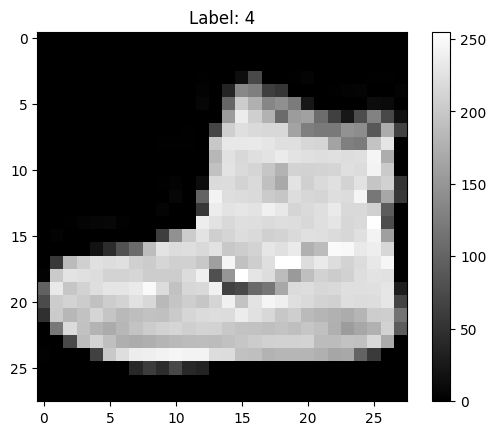

In [6]:
import matplotlib.pyplot as plt

# Convert row to numpy array and reshape to 28x28 matrix
example_image = x_train.iloc[0].values.reshape(28, 28)

# Display the image
plt.imshow(example_image, cmap='gray')
plt.title(f'Label: {y_train.iloc[0][0]}')  # Assuming the label column is named 'label'
plt.colorbar()
plt.show()


## Choose and Explain the Baseline Model:<br>
For our baseline model, we'll select a Decision Tree classifier. Decision Trees are considered shallow when their complexity is controlled, such as by limiting the tree's depth. A shallow decision tree (e.g., with a maximum depth of 3-5) is beneficial because:

It's easy to visualize and understand.
It limits the model from creating overly complex decision boundaries, which helps in avoiding overfitting.
It's computationally efficient, making it a good candidate for ensemble methods that require multiple instances of base estimators

## Train the Baseline Model with Cross-Validation<br>
### 1-Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier with a maximum depth
dt_classifier = DecisionTreeClassifier(max_depth=5)

# Perform 5-fold cross-validation
scores = cross_val_score(dt_classifier, x_train, y_train, cv=5)

# Print the mean accuracy and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.76 (+/- 0.01)


## 2 Apply the Bagging Method<br>
Bagging (Bootstrap Aggregating) helps in reducing variance and helps avoid overfitting. It involves training the same type of model on different subsets of the dataset and then averaging the predictions.



In [6]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging ensemble of decision trees
bagging_model = BaggingClassifier(base_estimator=dt_classifier, n_estimators=20, random_state=42)

# Evaluate the bagging ensemble using cross-validation
bagging_scores = cross_val_score(bagging_model, x_train, y_train, cv=5)

# Print the results
print("Bagging Accuracy: %0.2f (+/- %0.2f)" % (bagging_scores.mean(), bagging_scores.std() * 2))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarnin

Bagging Accuracy: 0.78 (+/- 0.01)


## 3-Apply the Boosting Method<br>
Boosting focuses on reducing bias and building a strong learner from several weak learners. It sequentially applies the weak classification algorithm to repeatedly modified versions of the data, focusing on correctly predicting the misclassified data points in the previous rounds.

In [7]:
from sklearn.ensemble import AdaBoostClassifier

# Create a boosting model using AdaBoost
boosting_model = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=20, random_state=42)

# Evaluate the boosting model using cross-validation
boosting_scores = cross_val_score(boosting_model, x_train, y_train, cv=5)

# Print the results
print("Boosting Accuracy: %0.2f (+/- %0.2f)" % (boosting_scores.mean(), boosting_scores.std() * 2))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

Boosting Accuracy: 0.70 (+/- 0.08)


### Model Validation and Performance Comparison
After training the baseline, bagging, and boosting models, the next step is to evaluate their performance on the test set. This will help us determine which ensemble method performs better and why.

In [8]:
from sklearn.metrics import accuracy_score

# Fit models on the full training set
dt_classifier.fit(x_train, y_train.values.ravel())  # Assuming y_train needs to be raveled if it's a DataFrame
bagging_model.fit(x_train, y_train.values.ravel())
boosting_model.fit(x_train, y_train.values.ravel())

# Predict on test set
dt_predictions = dt_classifier.predict(x_test)
bagging_predictions = bagging_model.predict(x_test)
boosting_predictions = boosting_model.predict(x_test)

# Calculate accuracy on test set
dt_accuracy = accuracy_score(y_test, dt_predictions)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

# Print the results
print(f"Decision Tree Accuracy on Test Set: {dt_accuracy:.2f}")
print(f"Bagging Accuracy on Test Set: {bagging_accuracy:.2f}")
print(f"Boosting Accuracy on Test Set: {boosting_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Accuracy on Test Set: 0.75
Bagging Accuracy on Test Set: 0.77
Boosting Accuracy on Test Set: 0.66


| Model Type     | Accuracy on Test Set |
|----------------|----------------------|
| Decision Tree  | 0.75                 |
| Bagging        | 0.77                 |
| Boosting       | 0.66                 |


Insight:
From the table, it's evident that the Bagging method achieved the highest accuracy (0.77) on the test set among the three approaches. This suggests that Bagging, which involves training multiple decision trees on different subsets of the dataset and averaging their predictions, is effective in reducing variance without significant overfitting.

The basic Decision Tree model has the second-highest accuracy at 0.75. While decision trees are simple and interpretable, they are prone to overfitting; however, in this case, the decision tree performs quite close to the Bagging method, indicating that for this dataset, the variance isn't drastically reduced by Bagging.

Boosting had the lowest accuracy at 0.66. Unlike Bagging, Boosting focuses on training subsequent models by focusing on incorrectly predicted instances by prior models. This usually reduces bias but can increase variance, which might suggest why Boosting underperformed in this scenario. It’s possible that Boosting overemphasized fitting to noise in the data or complex patterns that do not generalize well to unseen data.

In summary, Bagging appears to strike the best balance between bias and variance for this particular dataset. However, the lower performance of Boosting may necessitate further investigation into parameter tuning or the choice of the base learner to better capitalize on its bias-reduction capability.

## Part B: Guessing the Mystery Label

### Train a simple neural network (MLP) with 3 hidden layers having the following number of neurons [256,128,64] on the training set.

### Data Normalization

In [7]:
# Initialize a scaler using StandardScaler
scaler = StandardScaler()

# Fit on training data only
scaler.fit(x_train)

# Transform both training and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

 ### Build the MLP Model
Using TensorFlow and Keras to build the neural network:

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming there are 5 classes as per the labels description
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Train the Model**
Train the model using the normalized training data:

In [10]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

model.save('path_to_my_model.h5')

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.3492 - accuracy: 0.8706 - val_loss: 0.3089 - val_accuracy: 0.8844
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2598 - accuracy: 0.9064 - val_loss: 0.2713 - val_accuracy: 0.9031
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2249 - accuracy: 0.9163 - val_loss: 0.2752 - val_accuracy: 0.9040
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2035 - accuracy: 0.9248 - val_loss: 0.2564 - val_accuracy: 0.9065
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1868 - accuracy: 0.9312 - val_loss: 0.2816 - val_accuracy: 0.9080
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1710 - accuracy: 0.9379 - val_loss: 0.2633 - val_accuracy: 0.9112
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1591 - accuracy: 0.9411 - val_loss: 0.2518 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Evaluate the Model**
Finally,let's evaluate the model on the test set to check its performance:

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3112 - accuracy: 0.9113
Test accuracy: 0.911300003528595


In [39]:
y_test_array = y_test.iloc[:, 0].values

The MLP model demonstrates the highest accuracy among the four approaches, with a test set accuracy of 0.9113. This indicates that the MLP, with its deep learning capabilities, is potentially better suited for capturing complex patterns in the data compared to the more traditional machine learning models like Decision Trees and their ensemble variants.

313/313 [==============================] - 1s 4ms/step


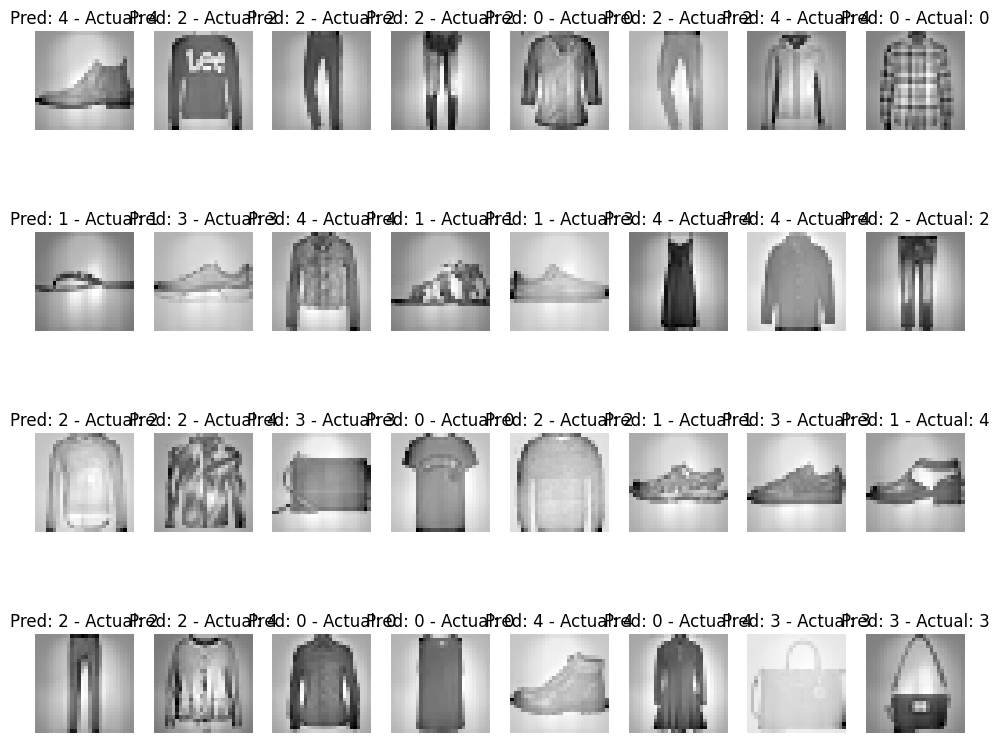

In [45]:
import matplotlib.pyplot as plt
import numpy as np

pred = model.predict(x_test_scaled)  # Assuming this returns categorical indices

fig, axes = plt.subplots(4, 8, figsize=(12, 10))  # Creating subplots
for i, ax in enumerate(axes.flat):
    if i < len(x_test_scaled):  # Make sure i doesn't exceed the number of available images
        ax.imshow(x_test_scaled[i].reshape(28, 28), cmap='binary')  # Plotting the image
        predicted_label = np.argmax(pred[i])  # Assuming pred is one-hot encoded
        actual_label = y_test_array[i]  # Using the array directly
        ax.set(title=f"Pred: {predicted_label} - Actual: {actual_label}")
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide unused subplots
plt.show()


lets load our sae model

In [46]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('path_to_my_model.h5')

**Extract the embeddings using the helper function from helper.py:**<br>
***Note:**
we just have one problem before calling this function:
 our neural network model created with TensorFlow/Keras does not inherently have the coefs_ and intercepts_ attributes that are typically found in sklearn models. These attributes are what we often use to access a model's weights and biases directly. In Keras, each layer's weights and biases are contained within complex data structures that are not as directly accessible as they are in sklearn.

To work around this, I provided code to extract these weights and biases in a manner that would make them resemble sklearn's coefs_ and intercepts_. This way, we can use the helper function seamlessly with our Keras model, allowing us to perform similar analytical steps as we would with an sklearn model. It's an approach tailored to ensure compatibility and maintain a consistent workflow, regardless of the machine learning framework being used

In [47]:
for layer in loaded_model.layers:
    weights, biases = layer.get_weights()
    print("Weights:", weights)  # Numpy array of weights
    print("Biases:", biases)    # Numpy array of biases


Weights: [[ 1.7379653e-02  5.4366563e-02 -7.0742190e-02 ...  5.8285862e-02
   2.4036884e-02 -2.1488311e-02]
 [ 1.3514189e-01  7.9412788e-02  9.6248416e-03 ... -7.0593044e-02
  -3.3893883e-02 -1.1481935e-01]
 [ 4.2042512e-02 -9.2489295e-02  8.9616850e-02 ... -1.9313182e-05
   9.7835965e-02 -4.9408715e-02]
 ...
 [-7.5429112e-02  1.3929576e-01  6.9038063e-02 ... -4.5526523e-02
   3.8242090e-02 -1.2581392e-01]
 [-7.1468174e-02 -1.0513511e-01 -1.2465261e-02 ... -1.1327135e-01
   6.7762807e-02 -5.6322388e-02]
 [-1.1329353e-02 -5.2745052e-02 -8.4139585e-02 ... -8.6809687e-02
  -5.6605864e-02  3.6706626e-03]]
Biases: [-0.13395523 -0.35335582 -0.44224373 -0.16666546 -0.18029477 -0.28892514
 -0.24128498 -0.23558208 -0.32042027 -0.28295353 -0.20996632 -0.237403
 -0.2267223  -0.4211177  -0.2577695  -0.20851327 -0.08101958 -0.35005635
 -0.250352   -0.12169136 -0.22984764 -0.1215044  -0.21130514 -0.27007324
 -0.22927293 -0.17325178 -0.22375062 -0.37986302 -0.38429523 -0.18198141
 -0.27748758 -0.2121

In [48]:
def get_coefs(model):
    coefs = []
    intercepts = []
    for layer in model.layers:
        weights = layer.get_weights()
        if weights:  # Check if layer has weights
            coefs.append(weights[0])  # append weights matrix
            if len(weights) > 1:
                intercepts.append(weights[1])  # append biases if present
            else:
                intercepts.append(None)  # No biases for this layer
    return coefs, intercepts

coefs, intercepts = get_coefs(model)
print("Coefs:", coefs)
print("Intercepts:", intercepts)


Coefs: [array([[ 1.7379653e-02,  5.4366563e-02, -7.0742190e-02, ...,
         5.8285862e-02,  2.4036884e-02, -2.1488311e-02],
       [ 1.3514189e-01,  7.9412788e-02,  9.6248416e-03, ...,
        -7.0593044e-02, -3.3893883e-02, -1.1481935e-01],
       [ 4.2042512e-02, -9.2489295e-02,  8.9616850e-02, ...,
        -1.9313182e-05,  9.7835965e-02, -4.9408715e-02],
       ...,
       [-7.5429112e-02,  1.3929576e-01,  6.9038063e-02, ...,
        -4.5526523e-02,  3.8242090e-02, -1.2581392e-01],
       [-7.1468174e-02, -1.0513511e-01, -1.2465261e-02, ...,
        -1.1327135e-01,  6.7762807e-02, -5.6322388e-02],
       [-1.1329353e-02, -5.2745052e-02, -8.4139585e-02, ...,
        -8.6809687e-02, -5.6605864e-02,  3.6706626e-03]], dtype=float32), array([[-0.01355125, -0.06087808, -0.01146299, ...,  0.04028189,
         0.09968498,  0.25136423],
       [ 0.02056974,  0.05429979, -0.05315937, ...,  0.02648411,
         0.00476721, -0.02190971],
       [ 0.10405415, -0.02493951,  0.08599248, ...,  0.

now we can call our function :

In [49]:
import numpy as np

def get_hidden_layer_activations(model, X, layer_index):
    """Calculate the activations of a specified hidden layer.

    Parameters:
    - model: Trained instance of sklearn.neural_network.MLPClassifier.
    - X: Input data, numpy array of shape (n_samples, n_features).
    - layer_index: Index of the hidden layer for which to compute activations.

    Returns:
    - Activations of the specified hidden layer, numpy array of shape (n_samples, n_units_in_layer).
    """
    if layer_index < 0 or layer_index >= len(coefs) - 1:
        raise ValueError("Invalid layer_index.")

    # Forward propagate through the network until the specified layer
    activations = X
    for i in range(layer_index + 1):
        activations = np.dot(activations, coefs[i]) + intercepts[i]
        if i < len(coefs) - 1:
            activations = np.maximum(0, activations)

    return activations



In [50]:
from tensorflow.keras.models import load_model
mlp =loaded_model
data =  x_test_scaled
i =2 #to get activations from the third hidden layer


# Retrieve activations for the ith hidden layer
embeddings = get_hidden_layer_activations(mlp, data, i)

**Dimensionality Reduction with PCA and LDA**
First, we need to apply PCA and LDA to the embeddings to reduce their dimensionality to 2D for visualization

In [51]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Apply LDA
lda = LDA(n_components=2)  # n_components should be min(n_classes - 1, n_features)
embeddings_lda = lda.fit_transform(embeddings, y_test)  # y_test is needed as LDA is supervised


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 **Visualization of PCA and LDA**

In [52]:
print("Type of y_test:", type(y_test))
print("y_test head:", y_test.head())


Type of y_test: <class 'pandas.core.frame.DataFrame'>
y_test head:    0
0  4
1  2
2  2
3  2
4  0


In [53]:
# Convert the DataFrame column to a numpy array
label_array = y_test.iloc[:, 0].values


<ipython-input-55-e8b3ba15335f>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


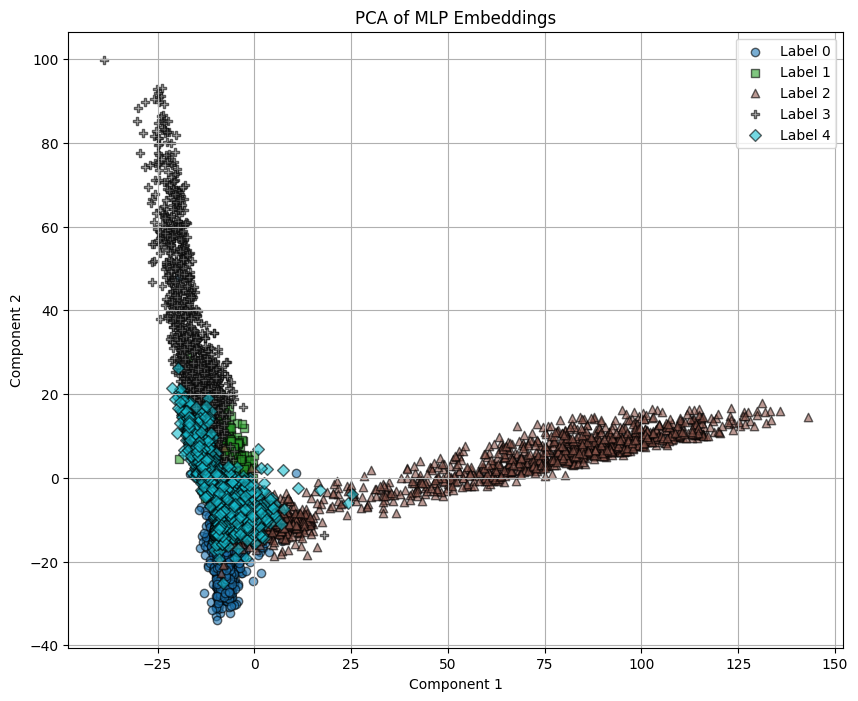

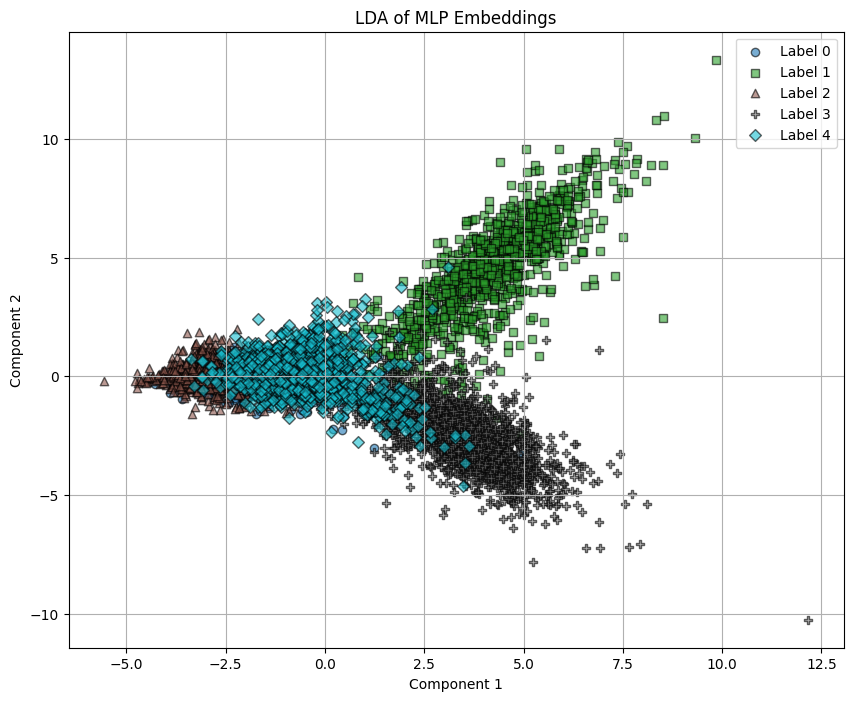

In [55]:
def plot_embeddings(embeddings, labels, title):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))
    markers = ['o', 's', '^', 'P', 'D', '*', 'X', '>', '<', 'v']

    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(embeddings[idx, 0], embeddings[idx, 1], color=colors(i), marker=markers[i % len(markers)],
                    label=f'Label {label}', alpha=0.6, edgecolors='k')

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

#  plotting pca And lda
plot_embeddings(embeddings_pca, label_array, 'PCA of MLP Embeddings')
plot_embeddings(embeddings_lda, label_array, 'LDA of MLP Embeddings')


The PCA plot shows that data points are mostly spread out along one main direction, which suggests there’s one key feature that varies a lot among the data. However, the data points are all mixed together, indicating that the PCA isn't clearly separating the different labels(as because it cares  about not overlapping the point mpre than seperating the classes .

On the other hand, the LDA plot looks a bit better in terms of grouping the same labels closer together, showing that LDA is using the label information to find a better way to spread out the data points.

Both plots have some overlap between different labels, meaning that the model might be finding it tricky to tell some of the classes apart.

### Perform K-Means Clustering

In [56]:


# Perform K-Means clustering on the embeddings
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings_pca)  #  embeddings_pca is our PCA-reduced data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-57-bda297de3b7d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(np.unique(clusters)))
<ipython-input-57-bda297de3b7d>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


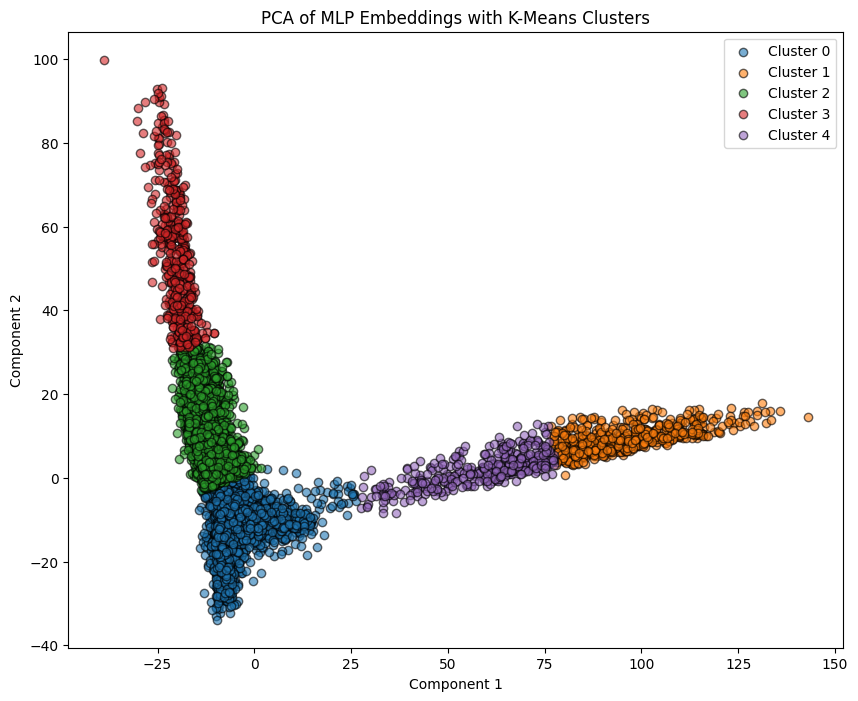

In [57]:
plt.figure(figsize=(10, 8))
# Generate a color map with a unique color for each cluster
cmap = plt.cm.get_cmap('viridis', len(np.unique(clusters)))

# Plot each cluster with a label and color
for cluster_number in np.unique(clusters):
    plt.scatter(
        embeddings_pca[clusters == cluster_number, 0],
        embeddings_pca[clusters == cluster_number, 1],
        cmap=cmap(cluster_number),
        label=f'Cluster {cluster_number}',
        alpha=0.6, edgecolors='k'
    )

plt.title('PCA of MLP Embeddings with K-Means Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()  # Include a legend to identify clusters
plt.show()


ok, now we reach the fun part. as this is unsupervised ML, and we dont know what is the label for each cluster, we will plot each cluster to gess what is its label:


Visualizing Cluster 0


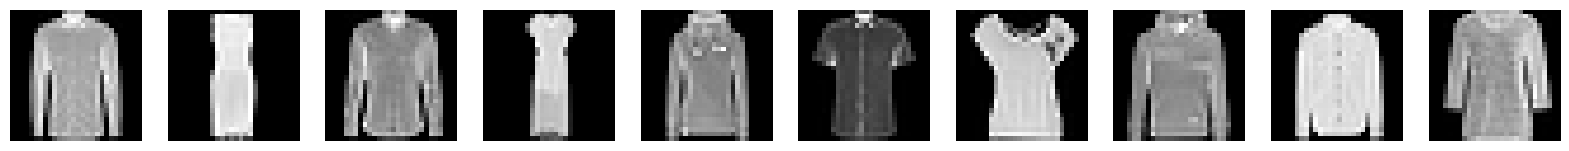

Visualizing Cluster 1


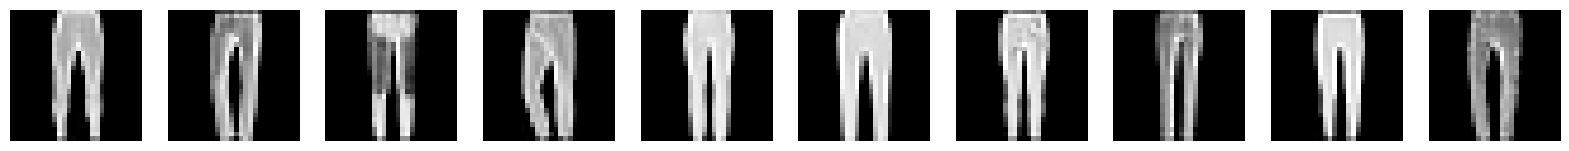

Visualizing Cluster 2


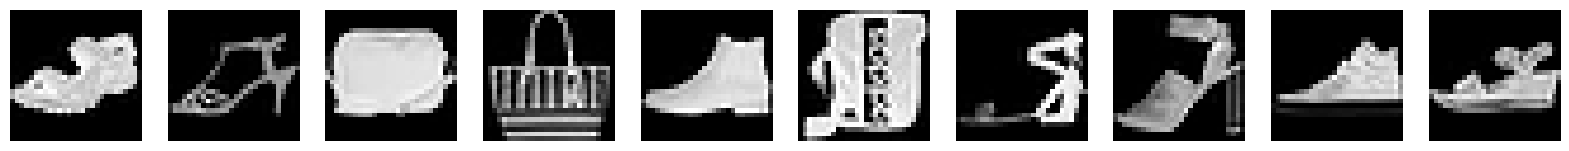

Visualizing Cluster 3


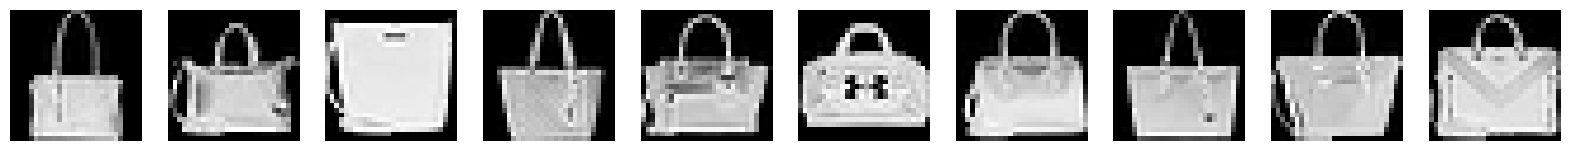

Visualizing Cluster 4


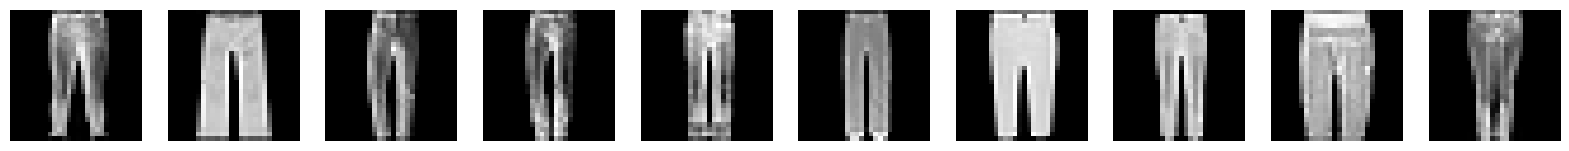

In [59]:
def plot_images_from_cluster(X, cluster_labels, cluster_number, n_images=10):
    # Filter the images belonging to a specific cluster
    images_in_cluster = X[cluster_labels == cluster_number]

    # Select n_images randomly from this cluster
    random_indices = np.random.choice(images_in_cluster.shape[0], n_images, replace=False)
    images_to_plot = images_in_cluster.iloc[random_indices].values if isinstance(images_in_cluster, pd.DataFrame) else images_in_cluster[random_indices]

    # Plot the images
    fig, axes = plt.subplots(1, n_images, figsize=(20, 2))
    for i, ax in enumerate(axes.flat):
        # Reshape the image data correctly assuming the flattened image data is of size 784 (28x28)
        ax.imshow(images_to_plot[i].reshape(28, 28), cmap='gray')
        ax.axis('off')  # Hide the axes
    plt.show()

# Assuming clusters is a numpy array with the cluster labels
# and x_test is a DataFrame or numpy array with each row as an image
for cluster_number in range(5):  # We have 5 clusters from K-Means
    print(f"Visualizing Cluster {cluster_number}")
    plot_images_from_cluster(x_test, clusters, cluster_number)


now we can guess the labels:
label 0 : Shirts/T-Shirts/Top <br>
label 1 : Pullover/Trouser  <br>
label 2 : Sandals/Slippers/Sneakers<br>
label 3 : bages<br>
label 4 : Pullover/Trouser<br>  

however we can see that we got 2 cluster for Pullover/Trouser  
lets plot more image to get clearer vision:

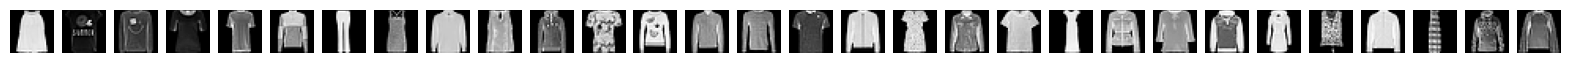

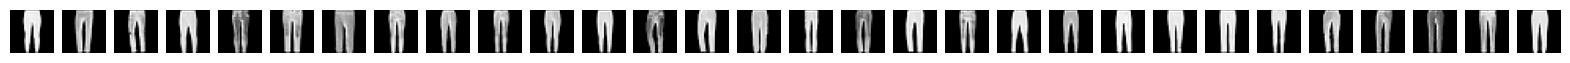

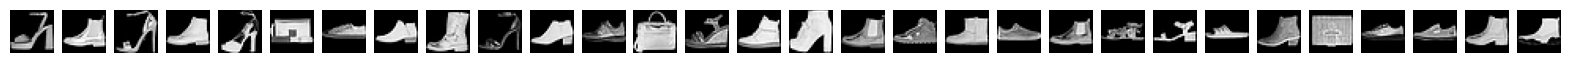

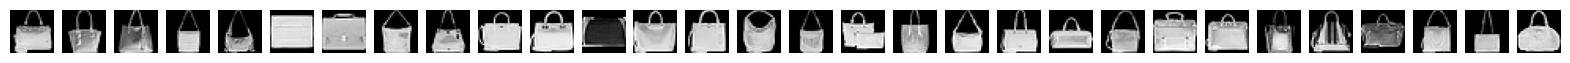

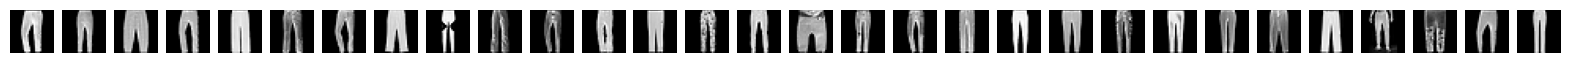

In [60]:
def plot_images_from_cluster(X, cluster_labels, cluster_number, n_images=10):
    # Filter the images belonging to a specific cluster
    images_in_cluster = X[cluster_labels == cluster_number]

    # If X is a DataFrame, make sure to convert it to a NumPy array
    if isinstance(X, pd.DataFrame):
        images_in_cluster = images_in_cluster.values

    # Select n_images randomly from this cluster
    if images_in_cluster.shape[0] > n_images:
        random_indices = np.random.choice(images_in_cluster.shape[0], n_images, replace=False)
    else:
        # If there are fewer images than n_images, use all available images
        random_indices = np.arange(images_in_cluster.shape[0])

    images_to_plot = images_in_cluster[random_indices]

    # Plot the images
    fig, axes = plt.subplots(1, n_images, figsize=(20, 2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images_to_plot[i].reshape(28, 28), cmap='gray')
        ax.axis('off')  # Hide the axes
    plt.show()

# Now, call the function for clusters 1 and 4 with the desired number of images
plot_images_from_cluster(x_test, clusters, cluster_number=0, n_images=30)  # for cluster 1
plot_images_from_cluster(x_test, clusters, cluster_number=1, n_images=30)  # for cluster 4
plot_images_from_cluster(x_test, clusters, cluster_number=2, n_images=30)  # for cluster 4
plot_images_from_cluster(x_test, clusters, cluster_number=3, n_images=30)  # for cluster 4
plot_images_from_cluster(x_test, clusters, cluster_number=4, n_images=30)  # for cluster 4

so cluster 1 and 4 the result are very similar. maybe the reason as we can see in the plot "PCA of MLP Embeddings with K-Means Clusters", the cluster 1 and 4(purple and orange), are positioned very close to each other

### **Further Analysis**

**Visualization of the average image for each cluster in a single figure**:
plotting average images of each distinct class found within our dataset

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_test is already loaded and flattened. Check and reshape:
if x_test_scaled.ndim == 2 and x_test_scaled.shape[1] == 784:  # only reshape if it's not already reshaped
    x_test_subset = x_test_scaled.reshape((-1, 28, 28))
else:
    x_test_subset = x_test_scaled  # This assumes x_test is already in the correct shape

# Flatten y_test if it's one-hot encoded or ensure it's a suitable format for indexing
if label_array.ndim > 1:
    y_test_subset = np.argmax(label_array, axis=1)  # Converting from one-hot to categorical labels
else:
    y_test_subset = label_array.flatten()  # Flatten if it's not already a flat array

print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

# Check shapes and types
print(f"x_test_subset type: {type(x_test_subset)}, shape: {x_test_subset.shape}")
print(f"y_test_subset type: {type(y_test_subset)}, shape: {y_test_subset.shape}")


x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)
x_test_subset type: <class 'numpy.ndarray'>, shape: (10000, 28, 28)
y_test_subset type: <class 'numpy.ndarray'>, shape: (10000,)


In [65]:
# Calculate the mean image for each class
classes = np.unique(y_test_subset)  # Get unique classes, in case some classes are missing
x_class = np.array([np.mean(x_test_subset[y_test_subset == cls], axis=0) for cls in classes])
classes = np.unique(y_test_subset)
print("Detected classes:", classes)

# Now, x_class[i] corresponds to the average image for class 'i'


Detected classes: [0 1 2 3 4]


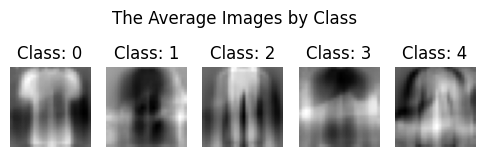

In [68]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=len(classes), figsize=(6, 2))
  # Adjust figsize based on the number of classes
if len(classes) == 1:
    axs = [axs]  # Wrap it in a list if there's only one subplot

for i, cls in enumerate(classes):
    axs[i].imshow(x_class[i], cmap='gray')
    axs[i].set_title(f'Class: {cls}')
    axs[i].axis('off')

fig.suptitle('The Average Images by Class')
plt.show()



## **Conclusion:**<br>
Throughout this nootbook, we have effectively navigated the complexities of the modified Fashion MNIST dataset. By implementing and comparing shallow classification models through ensemble techniques, we discovered the optimal approach for handling the data's inherent intricacies. Further, our exploration into dimensionality reduction and clustering provided valuable insights into the dataset’s structure, allowing us to formulate educated guesses about the nature of the "mystery labels". The combination of analytical strategies reinforced the potential of machine learning in transforming raw data into meaningful classifications. The examination of these methodologies not only highlighted their relative strengths and weaknesses but also showcased the practical implications of such techniques in real-world applications. This project not only tested our technical skills but also our ability to derive significant insights from complex, abstract data.